# House Prices - Advanced Regression Techniques

Team: Christian Vallat, Lara Kirby, Lauren Hawkins, Max Norwood, Umit Celik

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import make_scorer, mean_squared_log_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

pd.set_option('max_row',500)

## Data Collecting

The dataset used in this project is compiled by Dean De Cock and posted on Kaggle website, covering real housing transaction records from 2006 to 2010. The dataset is used for the competition on *https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview*

In this project, our goal is to develop an advanced regression model with limited *__Root Mean Squared Logarithmic Error (RMSLE)__*, which can be further used to predict housing prices in Ames City, Iowa after 2010. In the data science scope, the problem would be “How should housing prices in Ames City, Iowa be predicted?”. 

In addition to the main theme, subproblems include the selection of most influential real estate pricing features, exploration of correlation between them, the optimal regression model and encoding methods, etc. 

The Housing prices are provided in training data but not in the testing data. We will generate our machine learning model on the training set, predict the value on the testing set and upload the outcomes to the Kaggle website to get a final RMSLE score on our model.

Train data(train.csv), test data(test.csv) and data description(data_description.txt) can be downloaded through Kaggle KPI or directly on the competition webpage.

## Data Cleaning and Understanding

## Load Data

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Train data has one more column than test data since test data doesn't contain the target variable.

In [5]:
train_data.shape

(1460, 81)

In [6]:
test_data.shape

(1459, 80)

We combined train and test data together for data processing. Train data has both feature and response variables, while test data has only feature variables. We will need to make predictions according to test data and upload the predicted values onto Kaggle, thus verifying the score of our final model. 

In [7]:
data = pd.concat([train_data, test_data], axis = 0, ignore_index=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Handle Missing Data

In [9]:
data_cleaned = data.copy()

In [10]:
def missing_data(X):
    out = X.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'variable',0:'count'})
    out = out[out['count']>0]
    out['missing_ratio'] = np.round(out['count']/len(X),3)
    return out

In [11]:
missing_data(data_cleaned)

,variable,count,missing_ratio
0,PoolQC,2909,0.997
1,MiscFeature,2814,0.964
2,Alley,2721,0.932
3,Fence,2348,0.804
4,SalePrice,1459,0.500
5,FireplaceQu,1420,0.486
6,LotFrontage,486,0.166
7,GarageQual,159,0.054
8,GarageYrBlt,159,0.054
9,GarageFinish,159,0.054


From data description document, it explains that ‘NA’ is a class for some variables instead of missing data. For example, though PoolQC feature has 99.7% missing ratio, ‘NA’ in PoolQC refer to ‘No Pool’ for that house. However, for some of missing data for features with ‘NA’ class, those are actually missing data.

For example, missing data for ‘PoolQC’ with ‘PoolArea’ = 0 represent ‘No Pool’.

In [12]:
data_cleaned.filter(like='Pool')[data_cleaned.filter(like='Pool').isnull().any(axis=1)]

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
2914,0,NaN
2915,0,NaN
2916,0,NaN
2917,0,NaN


However, missing data for ‘PoolQC’ with ‘PoolArea’ > 0 are ‘real’ missing data. So we replace those missing data with ‘TA’(Typical) according to data description document.

In [17]:
data_cleaned.filter(like='Pool')[data_cleaned['PoolArea'] > 0]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
1974,144,Ex
2420,368,NaN
2503,444,NaN


In [14]:
data_cleaned.at[2420,'PoolQC'] = 'TA'
data_cleaned.at[2503,'PoolQC'] = 'TA'
data_cleaned.at[2573,'PoolQC'] = 'TA'

Then, we apply the similar method to other features

In [15]:
data_cleaned.filter(like='Garage')[data_cleaned.filter(like='Garage').isnull().any(axis=1)]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
99,NaN,NaN,NaN,0.0,0.0,NaN,NaN
108,NaN,NaN,NaN,0.0,0.0,NaN,NaN
125,NaN,NaN,NaN,0.0,0.0,NaN,NaN
127,NaN,NaN,NaN,0.0,0.0,NaN,NaN
140,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [16]:
data_cleaned.at[2126,'GarageYrBlt'] = round(data_cleaned[(data_cleaned['GarageType'] == 'Detchd') & (data_cleaned['GarageCars'] == 1)]['GarageYrBlt'].mean())
data_cleaned.at[2126,'GarageFinish'] = data_cleaned[(data_cleaned['GarageType'] == 'Detchd') & (data_cleaned['GarageCars'] == 1)]['GarageFinish'].mode()[0]
data_cleaned.at[2126,'GarageQual'] = data_cleaned[(data_cleaned['GarageType'] == 'Detchd') & (data_cleaned['GarageCars'] == 1)]['GarageQual'].mode()[0]
data_cleaned.at[2126,'GarageCond'] = data_cleaned[(data_cleaned['GarageType'] == 'Detchd') & (data_cleaned['GarageCars'] == 1)]['GarageCond'].mode()[0]

In [17]:
data_cleaned.at[2576,'GarageYrBlt'] = round(data_cleaned[data_cleaned['GarageType'] == 'Detchd']['GarageYrBlt'].mean())
data_cleaned.at[2576,'GarageFinish'] = data_cleaned[data_cleaned['GarageType'] == 'Detchd']['GarageFinish'].mode()[0]
data_cleaned.at[2576,'GarageQual'] = data_cleaned[data_cleaned['GarageType'] == 'Detchd']['GarageQual'].mode()[0]
data_cleaned.at[2576,'GarageCond'] = data_cleaned[data_cleaned['GarageType'] == 'Detchd']['GarageCond'].mode()[0]
data_cleaned.at[2576,'GarageCars'] = data_cleaned[data_cleaned['GarageType'] == 'Detchd']['GarageCars'].mode()[0]
data_cleaned.at[2576,'GarageArea'] = round(data_cleaned['GarageArea'][data_cleaned['GarageCars'] == data_cleaned[data_cleaned['GarageType'] == 'Detchd']['GarageCars'].mode()[0]].mean())

In [18]:
data_cleaned.filter(like='Bsmt')[data_cleaned.filter(like='Bsmt').isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
342,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [19]:
data_cleaned.at[332,'BsmtFinType2'] = data_cleaned['BsmtFinType2'][(data_cleaned['BsmtFinSF2'] > 300) & (data_cleaned['BsmtFinSF2'] < 600)].mode()[0]
data_cleaned.at[948,'BsmtExposure'] = data_cleaned['BsmtExposure'].mode()[0]
data_cleaned.at[1487,'BsmtExposure'] = data_cleaned['BsmtExposure'].mode()[0]
data_cleaned.at[2040,'BsmtCond'] = data_cleaned['BsmtCond'].mode()[0]
data_cleaned.at[2185,'BsmtCond'] = data_cleaned['BsmtCond'].mode()[0]
data_cleaned.at[2217,'BsmtQual'] = data_cleaned['BsmtQual'].mode()[0]
data_cleaned.at[2218,'BsmtQual'] = data_cleaned['BsmtQual'].mode()[0]
data_cleaned.at[2348,'BsmtExposure'] = data_cleaned['BsmtExposure'].mode()[0]
data_cleaned.at[2524,'BsmtCond'] = data_cleaned['BsmtCond'].mode()[0]

In [20]:
data_cleaned.filter(like='Mas')[data_cleaned.filter(like='Mas').isnull().any(axis=1)]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [21]:
data_cleaned.at[2610,'MasVnrType'] = data_cleaned['MasVnrType'][(data_cleaned['MasVnrArea'] >= 186) & (data_cleaned['MasVnrArea'] <= 210)].mode()[0]

After process those real missing data for features with ‘NA’, then we can replace ‘NA’ with ‘None’ for categorical features and with 0 for numerical features to avoid reading confusion for pd.read_csv.

For missing data for those features without ‘NA’ feature, we treat them all as ‘real’ missing data and use mode method to fill those missing data.

In [22]:
# Divide features with missing values into three categories based on data description document
NA_Features = ['Alley','MasVnrType','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
mode_Features = ['Electrical','MSZoning','Utilities','Functional','Exterior1st','Exterior2nd','KitchenQual','SaleType']
zero_Features = ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']

In [23]:
for i in data_cleaned.columns[data_cleaned.isnull().any()]:
    if i in NA_Features:
        data_cleaned[i]=data_cleaned[i].fillna('None')
    elif i in mode_Features:
        data_cleaned[i]=data_cleaned[i].fillna(train_data[i].mode()[0])
    elif i in zero_Features:
        data_cleaned[i]=data_cleaned[i].fillna(0)

In [24]:
missing_data(data_cleaned)

,variable,count,missing_ratio
0,SalePrice,1459,0.5


In [25]:
train_data_cleaned = data_cleaned.iloc[:1460, :]
train_data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

## Explore Numerical Features

In [25]:
X_train_cleaned = train_data_cleaned.drop(['Id','SalePrice'],axis=1)
y_train_cleaned = train_data_cleaned['SalePrice']
num_feartues = X_train_cleaned.select_dtypes(include = ['int64', 'float64'])
num_feartues.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


### Distribution Plots

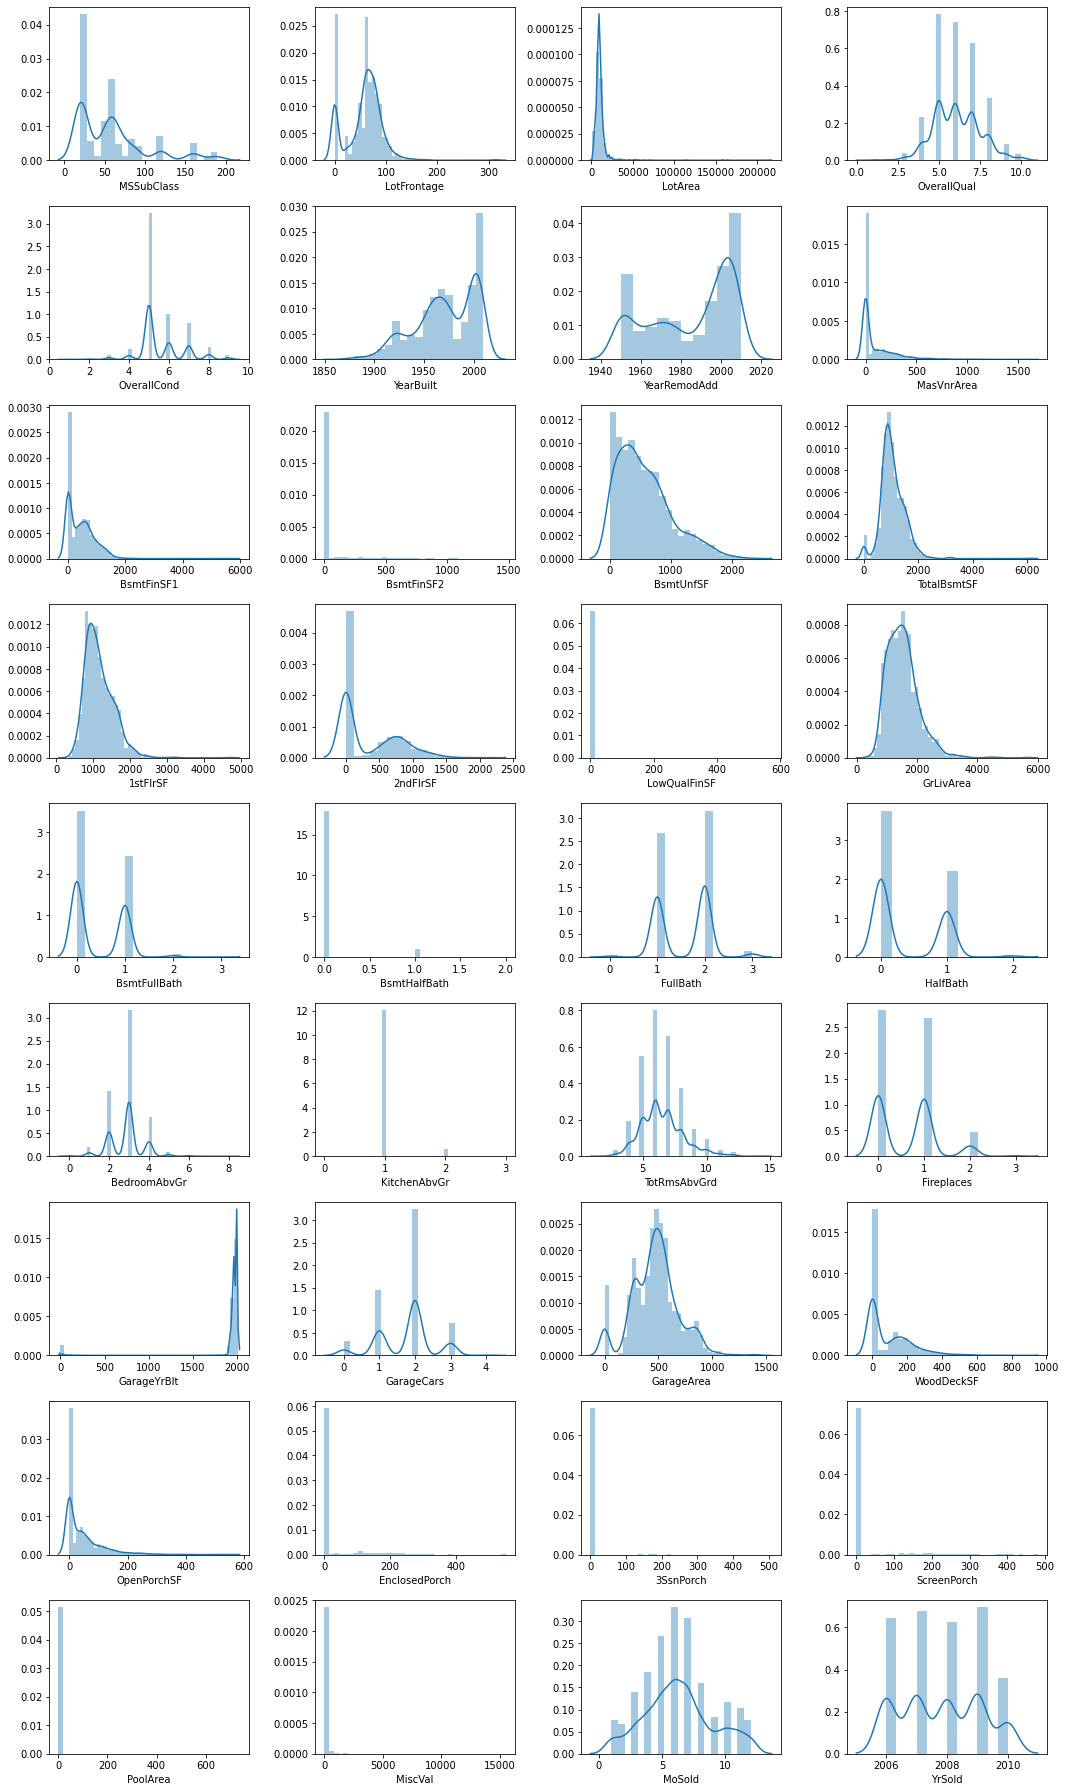

In [26]:
fig,ax = plt.subplots(9,4,figsize=(15,25))
for i,var in enumerate(num_feartues.columns):
    ax_sub=ax[i//4,i%4]
    sns.distplot(num_feartues[var], ax = ax_sub)
    ax_sub.set_xlabel(var)
    

plt.tight_layout()
plt.show()

### Numerical Features vs SalePrice

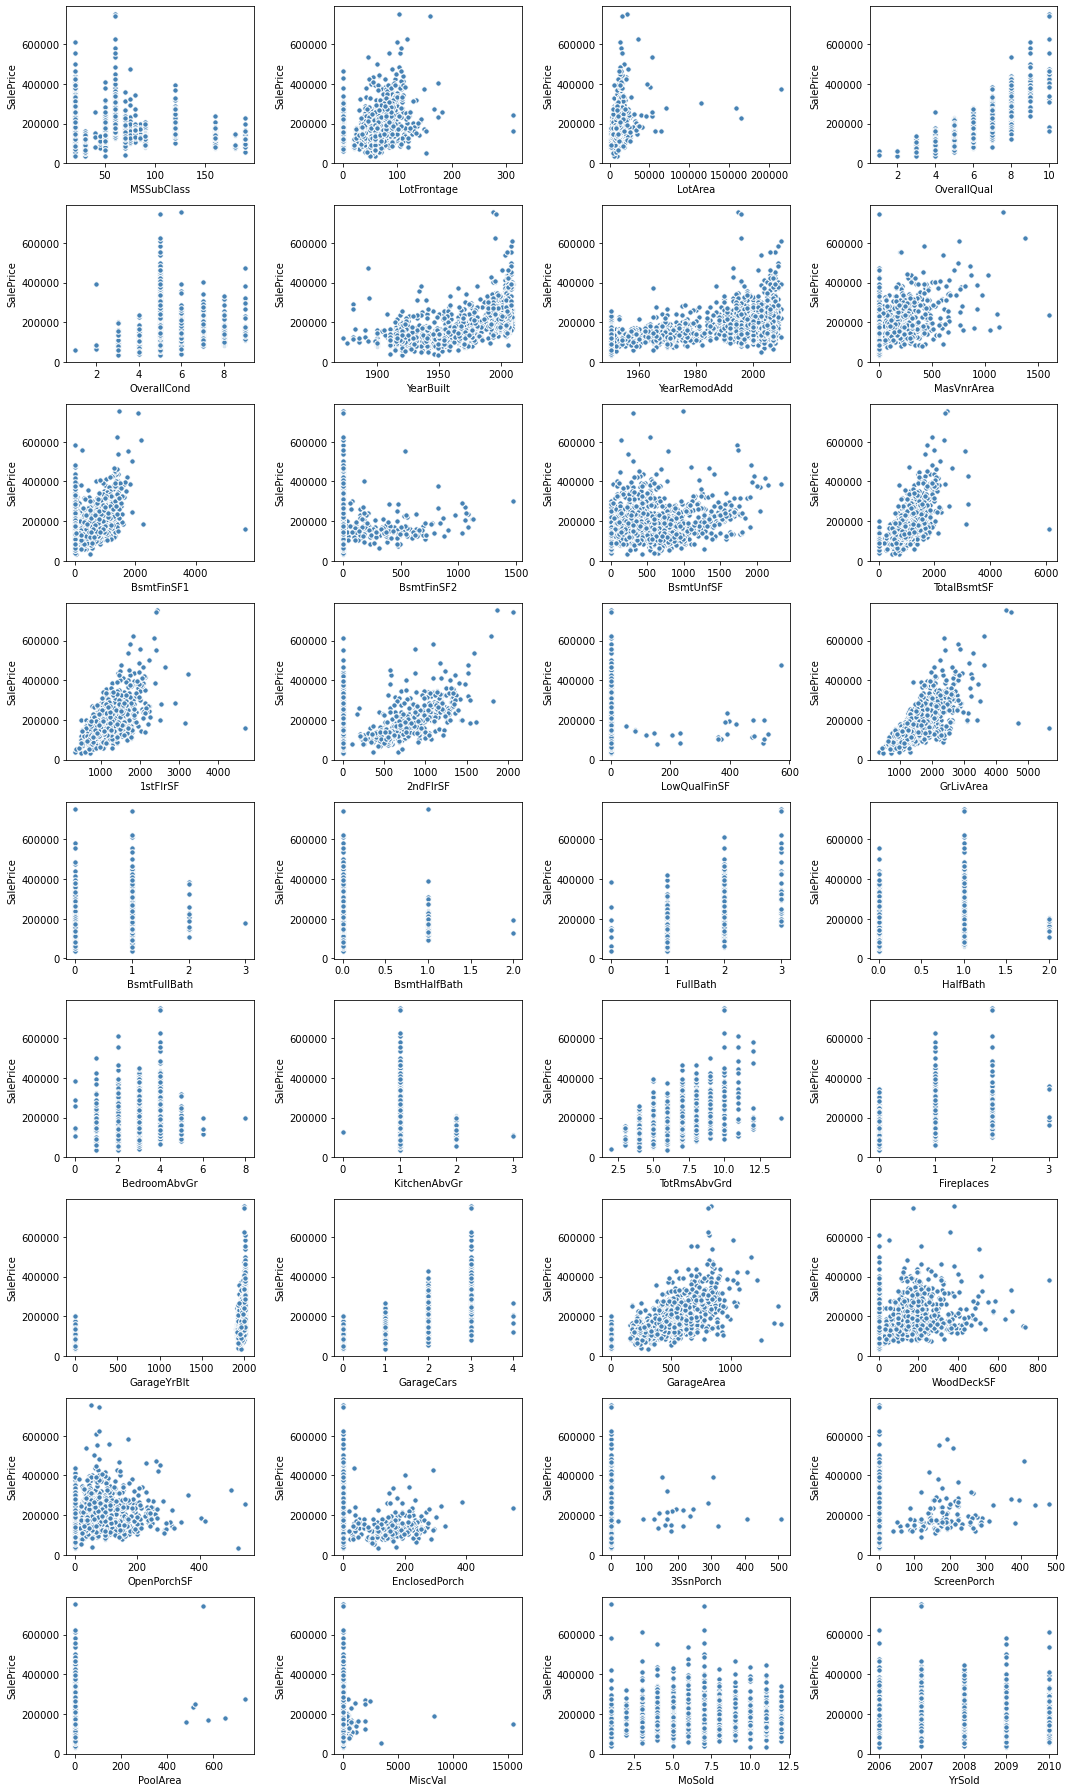

In [27]:
fig,ax = plt.subplots(9,4,figsize=(15,25))
for i,var in enumerate(num_feartues.columns):
    ax_sub=ax[i//4,i%4]
    ax_sub.scatter(X_train_cleaned[var],y_train_cleaned,color='steelblue',edgecolor='white',s=30)
    ax_sub.set_xlabel(var)
    ax_sub.set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

### Correct some numerical variables are actually categorical based on data desciption.

From data description document and plots generated above, we find some numerical variables are actually categorical. Hence we transfer their data type to object.

In [28]:
X_train_cleaned[['MSSubClass','YrSold','MoSold']] = X_train_cleaned[['MSSubClass','YrSold','MoSold']].astype('object')

## Explore Categorical Features

In [29]:
cat_feartues = X_train_cleaned.select_dtypes(include = 'object')
cat_feartues.shape

(1460, 46)

### Categorical Features vs SalePrice

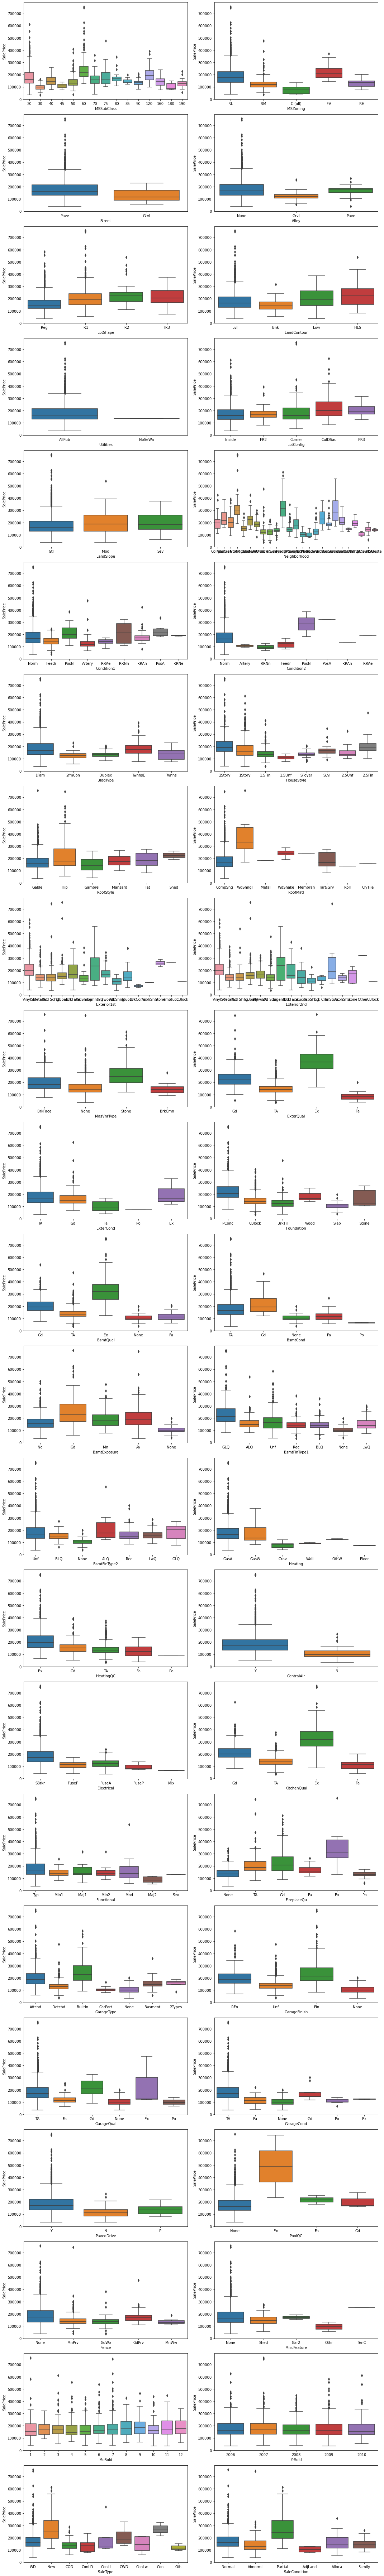

In [30]:
fig,ax = plt.subplots(23,2,figsize=(15,100))
for i,var in enumerate(cat_feartues.columns):
    ax_sub=ax[i//2,i%2]
    sns.boxplot(cat_feartues[var], y_train_cleaned, ax = ax_sub)    

plt.tight_layout()
plt.show()

# Data Processing

In [75]:
data_processed = data_cleaned.copy()

In [76]:
data_processed[['MSSubClass','YrSold','MoSold']] = data_processed[['MSSubClass','YrSold','MoSold']].astype('object')

data_processed.drop(data_processed.iloc[:1460,:][data_processed.iloc[:1460,:].GrLivArea>4000].index, inplace = True)

data_processed.reset_index(drop = True, inplace = True)

In [77]:
X = data_processed.drop(['Id','SalePrice'],axis=1)
y_train = data_processed.iloc[:1456, :]['SalePrice']

## Log Tramsform of SalePrice

Since the metric used on Kaggle is RMSLE, we log-transformed target variable before model for two reasons:
    
- Normalized the distribution of SalePrice.

- After log transformation, we can directly use RMSE as our performance valuation metric which is much easier to use during modeling and hypermeter tuning process.

In [78]:
y_train_log = np.log1p(y_train)

## Handle Catergorical Variables

## Standardize Numeriocal Variables

In [79]:
scaler = StandardScaler()

X_train_num = X.iloc[:1456, :].select_dtypes(include = ['int64', 'float64'])
X_test_num = X.iloc[1456:, :].select_dtypes(include = ['int64', 'float64'])

X_train_num = pd.DataFrame(data = scaler.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_test_num = pd.DataFrame(data = scaler.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)

### Custom Some Catergorical Encoding

After carefully reading the data description document, we found some categorical variables are ordinal. 

For example, the ExterQual feature has following classes,

       Ex - Excellent
       Gd - Good
       TA -  Average/Typical
       Fa - Fair
       Po – Poor
       
We can see features like ExterQual have inherent orders, so we use pandas replace method to manually encode those variables rather than sklearn’s build-in label encoder in order to preserve their ordinality.

In [80]:
X['ExterQual'] = X['ExterQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [4, 3, 2, 1, 0])
X['ExterCond'] = X['ExterCond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [4, 3, 2, 1, 0])
X['BsmtQual'] = X['BsmtQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po','None'], [5, 4, 3, 2, 1, 0])
X['BsmtCond'] = X['BsmtCond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po','None'], [5, 4, 3, 2, 1, 0])
X['BsmtExposure'] = X['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No', 'None'], [4, 3, 2, 1, 0])
X['BsmtFinType1'] = X['BsmtFinType1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], [6, 5, 4, 3, 2, 1, 0])
X['BsmtFinType2'] = X['BsmtFinType2'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], [6, 5, 4, 3, 2, 1, 0])
X['HeatingQC'] = X['HeatingQC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [4, 3, 2, 1, 0])
X['CentralAir'] = X['CentralAir'].replace(['N', 'Y'],[0, 1])
X['KitchenQual'] = X['KitchenQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [4, 3, 2, 1, 0])
X['FireplaceQu'] = X['FireplaceQu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po','None'], [5, 4, 3, 2, 1, 0])
X['GarageFinish'] = X['GarageFinish'].replace(['Fin', 'RFn', 'Unf', 'None'],[3, 2, 1, 0])
X['GarageQual'] = X['GarageQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po','None'], [5, 4, 3, 2, 1, 0])
X['GarageCond'] = X['GarageCond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po','None'], [5, 4, 3, 2, 1, 0])
X['PavedDrive'] = X['PavedDrive'].replace(['Y', 'P', 'N'],[2, 1, 0])
X['PoolQC'] = X['PoolQC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'None'], [4, 3, 2, 1, 0])
X['Electrical'] = X['Electrical'].replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [4, 3, 2, 1, 0])
X['Utilities'] = X['Utilities'].replace(['NoSeWa', 'AllPub'],[0, 1])

In [81]:
X_code = X[['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Electrical','Utilities']]
X_train_code = X_code.iloc[:1456, :]
X_test_code = X_code.iloc[1456:, :]

### OneHotEncoding for others

Categorical features without any inherent order are converted into numerical for our model using one hot encoding by pandas get_dummies method. 

In [82]:
X_cat = X.select_dtypes(include = 'object')
X_cat = pd.get_dummies(X_cat)
X_train_cat = X_cat.iloc[:1456, :]
X_test_cat = X_cat.iloc[1456:, :]

## Training and Testing Dataset

In [83]:
X_train = pd.concat([X_train_num, X_train_code, X_train_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_code, X_test_cat], axis = 1)

## Explore Correlations After Data Processing

In [84]:
train = pd.concat([X_train, y_train], axis = 1)
train_corr = train.corr()
SalePrice_corr = abs(train_corr['SalePrice'])
SalePrice_corr.sort_values(ascending = False)[:50]

SalePrice                1.000000
OverallQual              0.800858
GrLivArea                0.720516
ExterQual                0.694628
KitchenQual              0.666217
GarageCars               0.649256
TotalBsmtSF              0.646584
GarageArea               0.636964
1stFlrSF                 0.625235
BsmtQual                 0.592073
FullBath                 0.559048
GarageFinish             0.556808
TotRmsAbvGrd             0.537462
YearBuilt                0.535279
FireplaceQu              0.528841
YearRemodAdd             0.521428
Foundation_PConc         0.505863
MasVnrArea               0.473650
Fireplaces               0.466765
HeatingQC                0.435081
Neighborhood_NridgHt     0.419524
BsmtFinSF1               0.395923
MasVnrType_None          0.379859
SaleType_New             0.377228
BsmtExposure             0.373518
MSSubClass_60            0.373419
SaleCondition_Partial    0.371494
GarageType_Detchd        0.361463
MasVnrType_Stone         0.348909
Foundation_CBl

## Modeling and Evaluation

### Select Models

In this section, we will conduct the pre-selection of models. For each base regression model mentioned in the course, we will conduct the KFold cross validation to the training data. Each fold will be split into training and validation datasets, thus yielding a RMSLE score for each fold. Based on the mean cross validdatioin accuracy score, we can discern the based models with the highest accuracy scores. 

In [41]:
kf = KFold(n_splits=5)

seed = 42

linear = LinearRegression()
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor()
rf =  RandomForestRegressor(random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)

# For each model, use K-folds cross validation to calculate the CV accuracy

RMSLE_acc = []

for model in [linear, lasso, ridge, elnt, svm, knn, rf, ab, gb]: 
    print(model)

    acc_folds = []
    # For each fold, train the model and calculate the accuracy, then append it to acc_folds
    for (train_idx,val_idx) in kf.split(X=X_train,y=y_train_log):
        # Split training and validation sets for each fold
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train_log.iloc[train_idx], y_train_log.iloc[val_idx]

        # Fit model to the training data for this iteration
        model.fit(X_fold_train,y_fold_train)

        # Get predictions for the validation fold and calculate accuracy
        preds = model.predict(X_fold_val)
        RMSLE = mean_squared_error(y_fold_val,preds,squared=False)
        # Add the accuracy score to the acc_folds list
        acc_folds.append(RMSLE)
    RMSLE_acc.append(acc_folds)

    print('Mean cross-validation accuracy across all folds is {:.3f} \n'.format(np.mean(acc_folds)))
        

LinearRegression()
Mean cross-validation accuracy across all folds is 10139586755.894 

Lasso(random_state=42)
Mean cross-validation accuracy across all folds is 0.396 

Ridge(random_state=42)
Mean cross-validation accuracy across all folds is 0.120 

ElasticNet(random_state=42)
Mean cross-validation accuracy across all folds is 0.396 

SVR()
Mean cross-validation accuracy across all folds is 0.123 

KNeighborsRegressor()
Mean cross-validation accuracy across all folds is 0.166 

RandomForestRegressor(random_state=42)
Mean cross-validation accuracy across all folds is 0.138 

AdaBoostRegressor(random_state=42)
Mean cross-validation accuracy across all folds is 0.164 

GradientBoostingRegressor(random_state=42)
Mean cross-validation accuracy across all folds is 0.119 



### Visualize Cross Validation scores for each model except Linear Regression

According to the previous section, linear regression model is yielding an extremely high mean cross-validation accuracy score. The reason behind would be that the processed dataset has too many features (>200), resulting in the increment of noise for the linear regression model. 

In this section, we are visualizing the RMSLE score that we have acquired in the previous section for each of the five folds for Lasso, Ridge, ElasticNet, SVR, KNeighborsRegressor, RandomForestRegressor, AdaBoostRegressor and  GradientBoostingRegressor. In order to achieve the optimal computation efficiency, we will exclude linear regression from the visualization of the cross validation RMSLE score. 

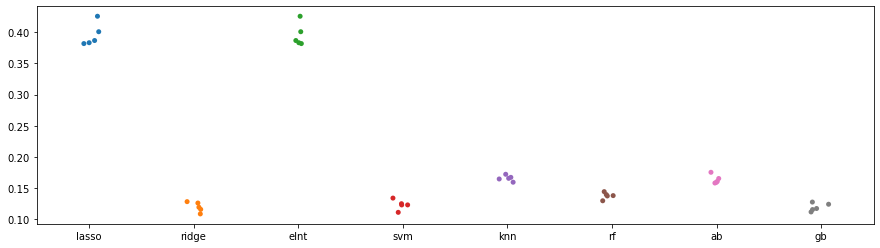

In [88]:
RMSLE_score = pd.DataFrame()
index = ['linear', 'lasso', 'ridge', 'elnt', 'svm', 'knn', 'rf', 'ab', 'gb']
for i in range(1,len(index)):
    RMSLE_score[index[i]] = RMSLE_acc[i]
    
plt.figure(figsize=(15,4))
sns.stripplot(data=RMSLE_score)
plt.show()

### Hyperparameter optimization

According to the visualization, the models with the three lowest cross validation RSMLE scores are: *__Ridge, SVM and GradientBoosting__*. For better computation efficiency, we will be conducting hyperparameter optimization only on these three models. 

If time allows, we would also tune the other regression models, which should advance the performance of the final model.

#### Ridge Regression

We will start with ridge regression, which is an extension of the linear regression with a penalty added to the loss function during the training process.

The hyperparameter of ridge regression is lambda, which represents the weight of the penalty to the loss function. The  default value of 1.0 will fully weight the penalty and 0 excludes the penalty.

However, since we have a large feature set, a higher alpha value would help drive the noises in our coefficients lower, thus educing the degree of overfitting. 

On that note, we are starting from the range of [0.001, 100]. We will apply lambda value as alpha into the Ridge Regression model, evaluate the score with cross validation, examine the lambda value with the lowest RMSLE through the *__visualization__* and shrink the range accordiingly.

Optimal lambda value is 10.000


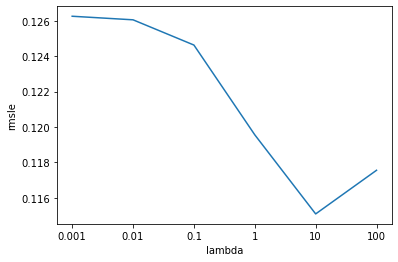

In [43]:
lambda_values = [10**i for i in range(-3,3,1)]

ridge_rmsle = []

for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val,random_state = 42)
    rmsle = abs(np.mean(cross_val_score(ridge_model, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
    ridge_rmsle.append(rmsle)
    
opt_lambda_ridge = lambda_values[np.argmin(ridge_rmsle)]
print('Optimal lambda value is {:.3f}'.format(opt_lambda_ridge))
    
plt.plot(np.log(lambda_values),ridge_rmsle)
plt.xticks(ticks=np.log(lambda_values),labels=lambda_values)
plt.xlabel('lambda')
plt.ylabel('rmsle')
plt.show()

From the plot above, the range around 10 tend to yield the best RMSLE score. In the next step, we set the range to [5,30] to check the RMSLE performance. 

Optimal lambda value is 16.000


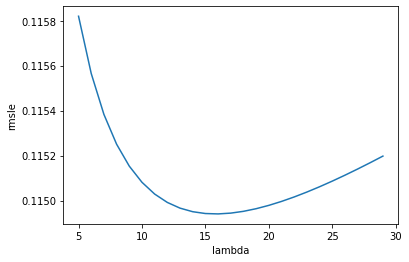

In [44]:
lambda_values = np.arange(5,30,1)

ridge_rmsle = []

for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val,random_state = 42)
    rmsle = abs(np.mean(cross_val_score(ridge_model, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
    ridge_rmsle.append(rmsle)
    
opt_lambda_ridge = lambda_values[np.argmin(ridge_rmsle)]
print('Optimal lambda value is {:.3f}'.format(opt_lambda_ridge))

plt.plot(lambda_values,ridge_rmsle)
plt.xlabel('lambda')
plt.ylabel('rmsle')
plt.show()

From the plot above, the range around 16 tend to yield the best RMSLE score. In the next step, we set the range to [15,17] to check the RMSLE performance. 

Optimal lambda value is 15.80


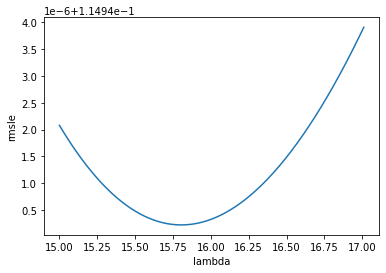

In [45]:
lambda_values = np.arange(15,17.01,0.01)

ridge_rmsle = []

for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val,random_state = 42)
    rmsle = abs(np.mean(cross_val_score(ridge_model, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
    ridge_rmsle.append(rmsle)
    
opt_lambda_ridge = lambda_values[np.argmin(ridge_rmsle)]
print('Optimal lambda value is {:.2f}'.format(opt_lambda_ridge))

plt.plot(lambda_values,ridge_rmsle)
plt.xlabel('lambda')
plt.ylabel('rmsle')
plt.show()

With 15.8 as the optimal lambda value, we set Ridge(alpha=opt_lambda_ridge,random_state = 42) as the tuned ridge regression model. The cross validated RMSLE score of the tuned model is 0.115, compariing to 0.120 for the base model.

In [46]:
ridge_base = Ridge(random_state = 42)
ridge_base_score = abs(np.mean(cross_val_score(ridge_base, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
print('Ridge base model RMSLE is {:.3f}'.format(ridge_base_score))
#Tuned Model
ridge_opt = Ridge(alpha=opt_lambda_ridge,random_state = 42)
ridge_opt_score = abs(np.mean(cross_val_score(ridge_opt, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
print('Ridge tuned model RMSLE is {:.3f}'.format(ridge_opt_score))

Ridge base model RMSLE is 0.120
Ridge tuned model RMSLE is 0.115


### Support Vector Machine Regression

In order to improve the support vector machine model, the three major parameters that need to be tuned are:

* Kernel, which tranforms low dimensoinal input space into higher dimensional space. 

* C, which represents the penalty. A high C value should be able to classify the data points correctly, while yielding a chance of overfitting and being computatoinally expensiive. Therefore, we are setting the range <= 1.0 for the C value in the parameter grid.

* Gamma, which define the influences of points, 'auto' will pass 1/n_features as value of gamma. 

Since all candidates within the paramaeter grid can be iterated at a relatively low computational cost, we are adopting *__GridSearch__* for cross validation of SVM Regression.

In [58]:
svm_model = SVR()

svm_param_grid  = {'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                   'kernel': ['linear', 'rbf', 'sigmoid'],
                  'gamma':['scale','auto']}

svm_grid_search = GridSearchCV(svm_model, svm_param_grid,cv=5, verbose=2, n_jobs = -1)
svm_grid_search.fit(X_train, y_train_log)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   52.7s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=2)

In [59]:
pprint(svm_grid_search.best_params_)

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}


With the best params showing above, we will apply them to generate the tuned SVM regression model. The cross validated RMSLE scores for the base model (0.123) and tuned model (0.118) are shown below.

In [60]:
svm_base = SVR()
svm_base_score = abs(np.mean(cross_val_score(svm_base, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
print('Support Vector Machine base model RMSLE is {:.3f}'.format(svm_base_score))
#Tuned Model
svm_opt = SVR(**svm_grid_search.best_params_)
svm_tuned_score = abs(np.mean(cross_val_score(svm_opt, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
print('Support Vector Machine tuned model RMSLE is {:.3f}'.format(svm_tuned_score))

Support Vector Machine base model RMSLE is 0.123
Support Vector Machine tuned model RMSLE is 0.118


### Gradient Boosting Regression

Gradient Boosting is an effective ensemble model which controls both the bias and variance aspects. The parameters used include:

* min_samples_slit (the minimum number of sample required in a node to be considered for splitting, helps control over-fitting) 

* min_samples_leaf (the minimum samples required in a terminal node or leaf, helps control over-fitting) 

* max_depth (the maximum depth of a tree, helps control over-fitting)

* learning_rate (the magnitude of the update in the estimates, lower value preferred for a robust model) 

* n_estimators (the number of sequential trees to be modeled (to be tuned for a particular learning rate)

* subsample (the fraction of observations to be selected for each tree, typically ~0.8)

Limited by computational capacity, we will use *__RandomizedSearch__* cross validation with 500 candidates for 5 folds. 

In [53]:
gb_model = GradientBoostingRegressor(random_state=42)

learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
max_depths = np.linspace(1, 10, 10, endpoint=True)
min_samples_splits = [2,3,4,5,6,7,8,9,10]
min_samples_leafs = [1,2,3,4,5,6,7,8,9,10]
gb_param_grid = {'learning_rate': learning_rates,
                 'n_estimators': n_estimators,
                 'max_depth': max_depths,
                 'min_samples_leaf': min_samples_splits,
                 'min_samples_split': min_samples_leafs,
                 'max_features':['auto', 'sqrt', 'log2'],
                 'subsample':[0.5, 0.8, 1.0]}

gb_random_search = RandomizedSearchCV(estimator = gb_model, param_distributions = gb_param_grid, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
gb_random_search.fit(X_train, y_train_log)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  9.5min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                                        'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
               

In [54]:
pprint(gb_random_search.best_params_)

{'learning_rate': 0.1,
 'max_depth': 2.0,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 500,
 'subsample': 0.8}


With the best params showing above, we will apply them to generate the tuned gradient boosting regression model. The cross validated RMSLE scores for the base model (0.119) and tuned model (0.116) are shown below. 

In [55]:
gb_base = GradientBoostingRegressor(random_state=42)
gb_base_score = abs(np.mean(cross_val_score(gb_base, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
print('GradientBoosting base model RMSLE is {:.3f}'.format(gb_base_score))
#Tuned Model
gb_opt = GradientBoostingRegressor(**gb_random_search.best_params_)
gb_tuned_score = abs(np.mean(cross_val_score(gb_opt, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
print('GradientBoosting tuned model RMSLE is {:.3f}'.format(gb_tuned_score))

GradientBoosting base model RMSLE is 0.119
GradientBoosting tuned model RMSLE is 0.116


### Ensembled Model and Output

In this part, we are combining the tuned Ridge, SVM and GradientBoosting regression models to achieve an ensembled model. We are using simple averaging method since the model would be regression. By ensembling, we are expecting to reduce overfitting, thus creating a smoother regression model. Also, with the three models being independent from eac other, the prerequisite for ensembling is fulfilled. 

If time allows, it would also be helpful for us to use stacking or other advanced ensemble methods on the aggregation of regression models. 

In [62]:
#voting
from sklearn.ensemble import VotingRegressor

estimators = []
estimators.append(("Ridge",ridge_opt))
estimators.append(("SVM",svm_opt))
estimators.append(("GradientBoosting",gb_opt))

Model_ensemble = VotingRegressor(estimators,  n_jobs = -1, verbose = 2)
ensemble_score = abs(np.mean(cross_val_score(Model_ensemble, X_train,y_train_log,scoring = 'neg_root_mean_squared_error', cv=5)))
print('ensembles RMSLE is {:.3f}'.format(ensemble_score))

ensembles RMSLE is 0.110


With the ensembled model yielding the cross-validated RMSLE score of 0.11, we proceed to use this as the model to predict the test dataset. After the predicted values are generated, they will go through the inverse process of log before being exported as csv data. 

In [85]:
Model_ensemble.fit(X_train,y_train_log)
test_preds = Model_ensemble.predict(X_test)
test_preds = np.expm1(test_preds)

In [86]:
out = pd.DataFrame()
out['Id'] = data.iloc[1460:, :]['Id']
out['SalePrice'] = test_preds
out.head()

,Id,SalePrice
1460,1461,118268.507616
1461,1462,159413.129593
1462,1463,181008.205453
1463,1464,194079.093853
1464,1465,189078.578586


Though we use cross validation for modelling selection to avoid overfitting, we got score of 0.12187 for testing data which is higher than RMSLE as 0.110 for training data. We think out model still has the chance to overfit, but the main possible underlying reason is that the testing dataset is more messy (more missing data) than training dataset which make prediction more difficult. 